In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Text(0.5, 0.98, 'Overall Title')

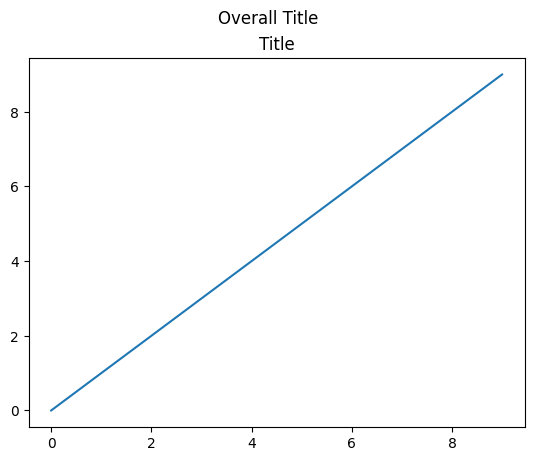

In [62]:
y = [i for i in range(10)]
fig, ax = plt.subplots()
ax.plot(y)
ax.set_title("Title")
fig.suptitle("Overall Title")

In [63]:
housing = pd.read_csv("../data/housing_data.csv")
housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325.0,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12.0,54.0,55.0,151.2,158062.5,38.300000


In [94]:
df = pd.read_excel("../data/HotelCustomersDataset.xlsx")

In [65]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df["date"] = (
    pd.to_datetime("2018-12-31") - pd.to_timedelta(df["DaysSinceCreation"], unit="D")
).astype("datetime64[ns]")

In [67]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [96]:
df = df.set_index("date")

In [97]:
df = df.groupby(["date"])[["LodgingRevenue", "OtherRevenue"]].sum()
monthly_revenue = df.resample("ME").sum()

Text(0.5, 1.0, 'Lodging vs Other')

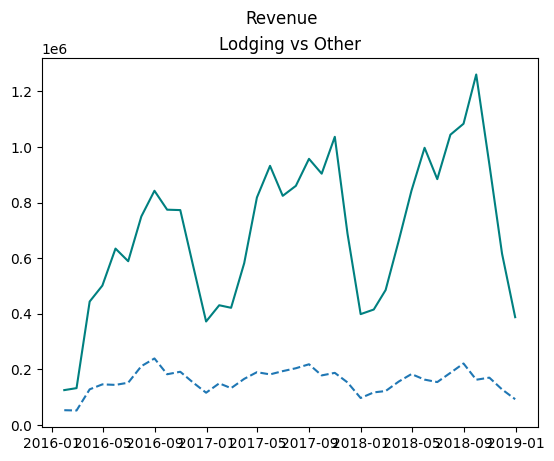

In [75]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"], color="teal")
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], linestyle="--")

fig.suptitle("Revenue")
ax.set_title("Lodging vs Other")

Text(0.5, 0, 'Date')

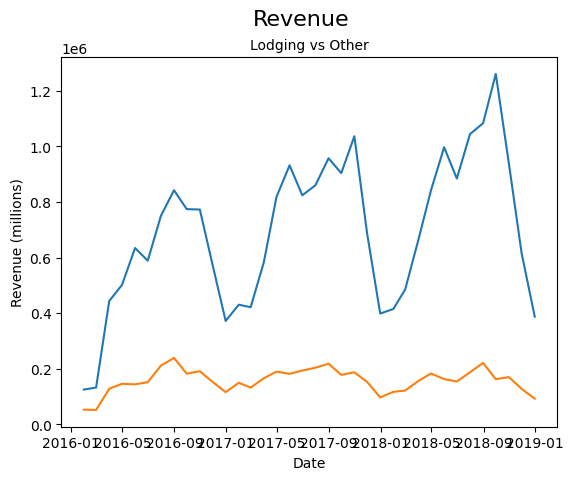

In [31]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"])

fig.suptitle("Revenue", fontsize=16)
ax.set_title("Lodging vs Other", fontsize=10)

ax.set_ylabel("Revenue (millions)", fontsize=10)
ax.set_xlabel("Date")

In [35]:
housing = pd.read_csv(
    "../data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_home_sold": "Int32", "region_name": "category"},
)

In [36]:
ca_housing = housing.loc[(housing["region_name"].str.contains("CA"))].assign(
    region_name=housing["region_name"].str[0:-11]
)

In [37]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529.0,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572.0,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102.0,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200.0,797.0,907.0,56.5,330049.9,9.744362


In [47]:
ca_housing_pivot = ca_housing.pivot(
    index="period_begin", columns="region_name", values="median_active_list_price"
).assign(CA_average=lambda x: x.mean(axis=1))

In [48]:
ca_housing_pivot

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,993370.2,493750.0,490808.3,462903.3,536384.6,388843.1,828948.5,699814.4,423755.8,383095.8,...,490624.0,461765.4,413387.3,464625.0,387928.9,479870.2,863099.5,655881.0,463954.5,686582.361818
2022-04-04,997424.5,478666.6,490808.3,462153.3,535051.2,388183.3,829281.8,699752.0,425564.1,383720.8,...,489378.1,462190.4,416804.0,468041.6,388951.8,478203.5,865182.9,654630.9,462704.5,687180.140000
2022-04-11,997720.8,469981.6,490808.3,461320.0,534126.2,392475.0,829281.8,699760.3,426772.5,385720.8,...,488128.1,462948.7,420220.6,476333.3,389863.7,469599.3,867682.8,654805.0,462830.0,687730.720000


In [49]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529.0,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572.0,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102.0,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200.0,797.0,907.0,56.5,330049.9,9.744362


In [51]:
ca_housing.sort_values("region_name", ascending=False)

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
288957,Yuba,2019-02-04,2019-04-28,104.0,42.0,45.0,45.8,318679.1,5.715413
155203,Yuba,2021-08-16,2021-11-07,327.0,142.0,169.0,31.9,423135.0,6.733261
130202,Yuba,2019-06-17,2019-09-08,96.0,32.0,35.0,59.9,325850.0,5.364782
610826,Yuba,2017-04-17,2017-07-09,69.0,11.0,12.0,42.1,388250.0,2.452354
312292,Yuba,2020-05-11,2020-08-02,82.0,21.0,23.0,72.0,344227.0,3.844571
...,...,...,...,...,...,...,...,...,...
508310,Alameda,2018-05-14,2018-08-05,4012.0,1552.0,1901.0,18.3,835870.6,5.738391
7162,Alameda,2017-06-19,2017-09-10,3830.0,1506.0,1841.0,23.4,752131.5,5.942412
133217,Alameda,2017-01-16,2017-04-09,2503.0,1131.0,1399.0,24.0,742021.6,6.968176
376519,Alameda,2020-12-21,2021-03-14,2941.0,963.0,1253.0,26.1,810737.5,5.215898


In [54]:
ca_housing.isna().sum()

region_name                   0
period_begin                  0
period_end                    0
total_homes_sold            387
inventory                    11
active_listings              10
age_of_inventory             11
median_active_list_price     20
months_of_supply            399
dtype: int64

In [98]:
df.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-01,10591.35,2472.96
2016-01-02,16600.46,11398.50
2016-01-03,13701.23,7978.80
2016-01-04,2896.70,750.98
2016-01-05,13940.15,6580.39


In [113]:
plot_df.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


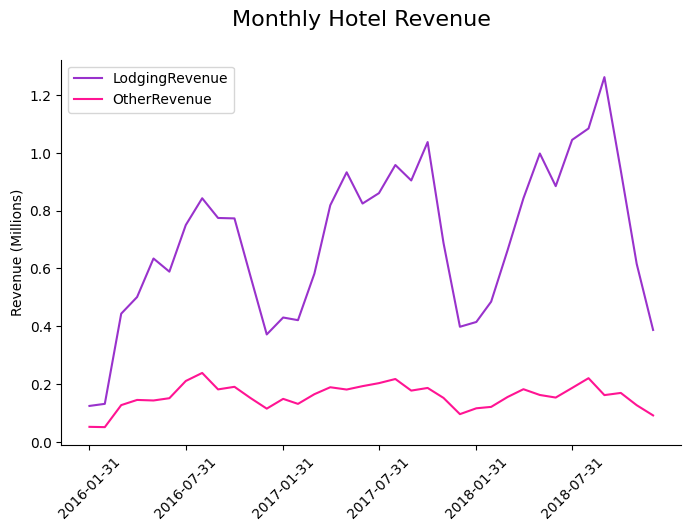

In [146]:
plot_df = df.resample("ME").sum()
x_loli = plot_df.index
y_loli = plot_df["OtherRevenue"] / 1000000

fig, ax = plt.subplots(figsize=(8, 5))

colors = ["darkorchid", "deeppink"]


for i, column in enumerate(plot_df.columns):
    ax.plot(plot_df[column] / 1000000, color=colors[i], label=plot_df.columns[i])


fig.suptitle("Monthly Hotel Revenue", fontsize=16)

ax.set_ylabel("Revenue (Millions)", fontsize=10)

ax.set_xticks(plot_df.index[::6])
plt.xticks(rotation=45)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc="upper left")

plt.show()

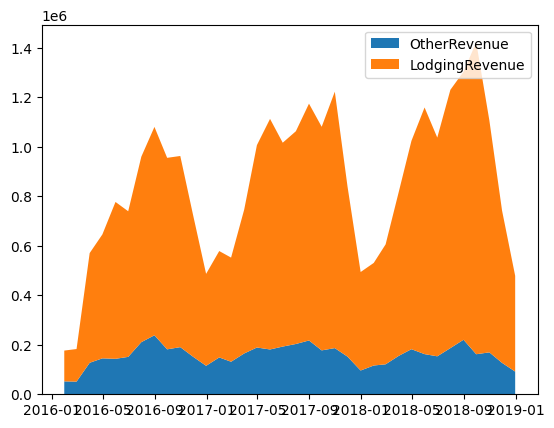

In [151]:
fig, ax = plt.subplots()

ax.stackplot(plot_df.index, plot_df["OtherRevenue"], plot_df["LodgingRevenue"])

ax.legend(["OtherRevenue", "LodgingRevenue"])

In [152]:
df = pd.read_excel("../data/HotelCustomersDataset.xlsx")

In [153]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df["date"] = (
    pd.to_datetime("2018-12-31") - pd.to_timedelta(df["DaysSinceCreation"], unit="D")
).astype("datetime64[ns]")

In [157]:
df = df.set_index("date")

In [159]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [160]:
room_nights = df.groupby("date")[["RoomNights", "BookingsCanceled"]].sum()

In [167]:
plot_df = room_nights.resample("QE").sum()

In [168]:
plot_df.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


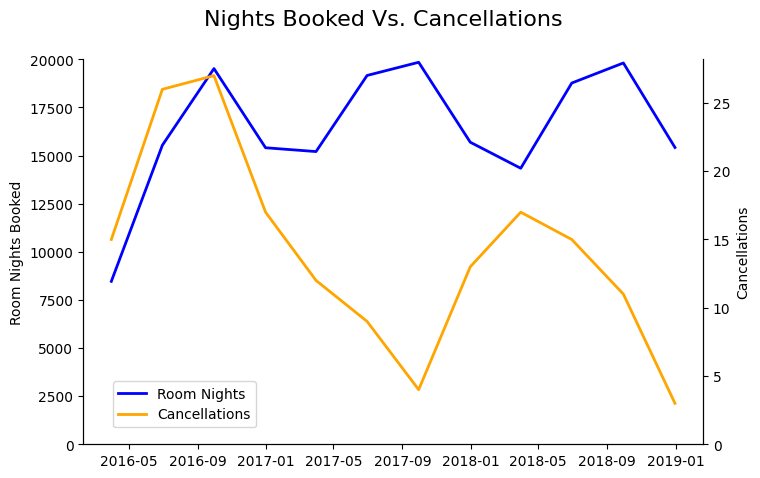

In [193]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(
    plot_df.index, plot_df["RoomNights"], label="Room Nights", color="blue", linewidth=2
)

ax2 = ax.twinx()

ax2.plot(
    plot_df.index,
    plot_df["BookingsCanceled"],
    label="Cancellations",
    color="orange",
    linewidth=2,
)
fig.suptitle("Nights Booked Vs. Cancellations", fontsize=16)

ax.set_ylabel("Room Nights Booked", fontsize=10)
ax2.set_ylabel("Cancellations", fontsize=10)

ax.set_ylim(0, 20000)
ax2.set_ylim(0)

ax.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)

fig.legend(bbox_to_anchor=(0.35, 0.25))

plt.show()

In [194]:
df = pd.read_excel("../data/HotelCustomersDataset.xlsx")

In [197]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
df.groupby("Nationality")[["RoomNights", "LodgingRevenue"]].sum()

,RoomNights,LodgingRevenue
Nationality,,
ABW,11,1896.52
AGO,630,96436.72
AIA,5,1164.60
ALB,37,3455.90
AND,14,3107.40
...,...,...
WLF,1,135.20
WSM,2,314.00
YEM,0,0.00


In [209]:
lodging = (
    (df.groupby("Nationality")["LodgingRevenue"].sum().sort_values(ascending=False))
    .reset_index()
    .loc[0:9]
)
lodging

,Nationality,LodgingRevenue
0,FRA,3809315.59
1,DEU,3113382.55
2,PRT,2715008.72
3,GBR,2693123.61
4,ESP,1475909.33
5,BEL,1047661.98
6,ITA,1032729.72
7,NLD,904460.78
8,USA,903336.11
9,BRA,787928.01


Text(0.5, 0, 'Revenue (Million Euro)')

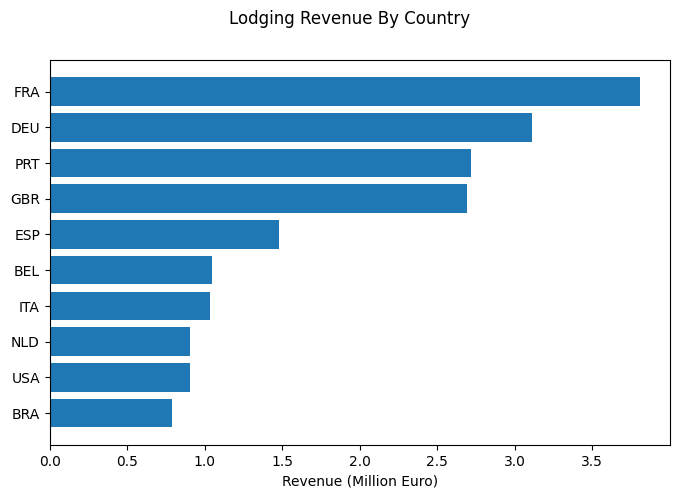

In [214]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.barh(lodging["Nationality"][::-1], lodging["LodgingRevenue"][::-1] / 1000000)

fig.suptitle("Lodging Revenue By Country")
ax.set_xlabel("Revenue (Million Euro)")

In [217]:
room_nights = (
    (df.groupby("Nationality")["RoomNights"].sum().sort_values(ascending=False))
    .reset_index()
    .loc[0:9]
)
room_nights

,Nationality,RoomNights
0,FRA,31018
1,DEU,26334
2,PRT,24334
3,GBR,20822
4,ESP,10877
5,ITA,8046
6,BEL,7758
7,NLD,6619
8,BRA,6535
9,USA,6495


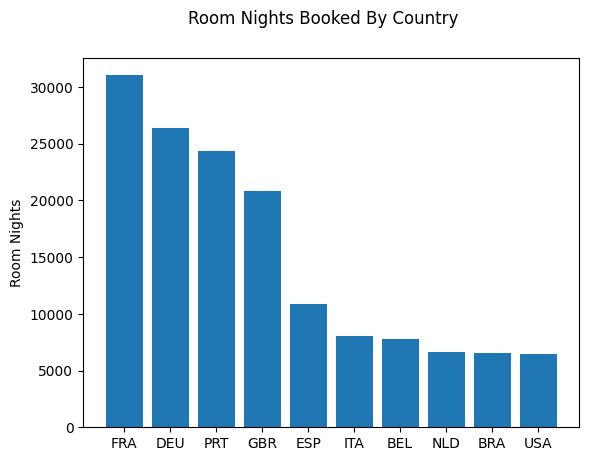

In [219]:
fig, ax = plt.subplots()

ax.bar(room_nights["Nationality"], room_nights["RoomNights"])

fig.suptitle("Room Nights Booked By Country")
ax.set_ylabel("Room Nights")

plt.show()

In [221]:
df = pd.read_excel("../data/HotelCustomersDataset.xlsx")

In [224]:
lodging = (
    df.groupby("Nationality")["LodgingRevenue"]
    .sum()
    .sort_values(ascending=False)
    .iloc[0:5]
)
lodging

Nationality
FRA    3809315.59
DEU    3113382.55
PRT    2715008.72
GBR    2693123.61
ESP    1475909.33
Name: LodgingRevenue, dtype: float64

In [226]:
other = (
    df.groupby("Nationality")["OtherRevenue"]
    .sum()
    .sort_values(ascending=False)
    .iloc[0:5]
)
other

Nationality
FRA    1033166.30
DEU     725541.53
PRT     665634.58
GBR     591212.77
ESP     319840.82
Name: OtherRevenue, dtype: float64

In [230]:
plot_df = (
    df.groupby("Nationality")[["LodgingRevenue", "OtherRevenue"]]
    .sum()
    .sort_values("LodgingRevenue", ascending=False)
    .iloc[0:5]
)
plot_df

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


[Text(0, 0, 'FRA'),
 Text(1, 0, 'DEU'),
 Text(2, 0, 'PRT'),
 Text(3, 0, 'GBR'),
 Text(4, 0, 'ESP')]

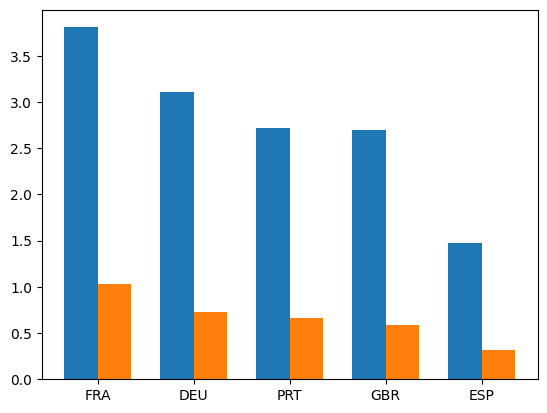

In [238]:
fig, ax = plt.subplots()

width = 0.35
x = np.arange(5)

ax.bar(x - width / 2, plot_df["LodgingRevenue"] / 1000000, width=width, label="Lodging")

ax.bar(x + width / 2, plot_df["OtherRevenue"] / 1000000, width=width, label="Other")

ax.set_xticks(x)
ax.set_xticklabels(plot_df.index)

In [239]:
plot_df = plot_df.apply(lambda x: x * 100 / sum(x), axis=1)

In [240]:
plot_df

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


In [245]:
plot_df.index

Index(['FRA', 'DEU', 'PRT', 'GBR', 'ESP'], dtype='object', name='Nationality')

In [247]:
plot_df["OtherRevenue"]

Nationality
FRA    21.335471
DEU    18.899606
PRT    19.689583
GBR    18.000981
ESP    17.810987
Name: OtherRevenue, dtype: float64

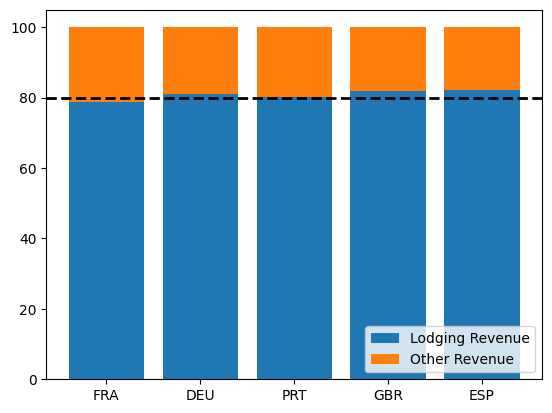

In [257]:
fig, ax = plt.subplots()

ax.bar(np.array(plot_df.index), plot_df["LodgingRevenue"], label="Lodging Revenue")
ax.bar(
    np.array(plot_df.index),
    plot_df["OtherRevenue"],
    bottom=plot_df["LodgingRevenue"],
    label="Other Revenue",
)
ax.axhline(80, ls="--", linewidth=2, color="black")
ax.legend(loc="lower right")
plt.show()

In [260]:
df = pd.read_excel("../data/HotelCustomersDataset.xlsx")

In [ ]:
rev = df.groupby("Nationality")["LodgingRevenue"].sum().sort_values(ascending=False)


rev.iloc[0:6]
pd.DataFrame({"OTH": rev.iloc[6:].sum()})

In [279]:
rev.iloc[6:].sum()

10122464.68

In [283]:
plot_df = pd.DataFrame(rev.iloc[:5])
plot_df

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33


In [284]:
plot_df.loc["OTH"] = rev.iloc[6:].sum()

In [285]:
plot_df

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
OTH,10122464.68


In [297]:
plot_df = plot_df.sort_values("LodgingRevenue", ascending=False)

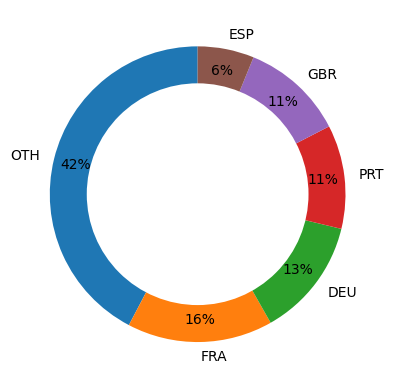

In [306]:
fig, ax = plt.subplots()
ax.pie(
    plot_df["LodgingRevenue"],
    labels=plot_df.index,
    startangle=90,
    pctdistance=0.85,
    autopct="%.0f%%",
)
donut_hole = plt.Circle((0, 0), 0.75, fc="white")
fig = plt.gcf()
fig.gca().add_artist(donut_hole)
plt.show()

In [307]:
df = pd.read_excel("../data/HotelCustomersDataset.xlsx")

In [313]:
df.head()
# DEU, FRA

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [316]:
hist_df = df.loc[
    (df["Nationality"] == "FRA") | (df["Nationality"] == "DEU"), ["Age", "Nationality"]
]
hist_df.head()

,Age,Nationality
2,31.0,DEU
3,60.0,FRA
4,51.0,FRA
7,32.0,FRA
8,42.0,FRA


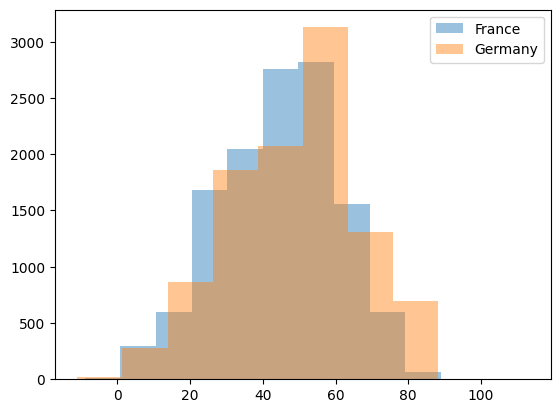

In [324]:
fig, ax = plt.subplots()

ax.hist(hist_df.loc[hist_df["Nationality"] == "FRA", "Age"], alpha=0.45, label="France")

ax.hist(
    hist_df.loc[hist_df["Nationality"] == "DEU", "Age"], alpha=0.45, label="Germany"
)

ax.legend()

plt.show()

In [326]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [327]:
df = df.assign(
    total_revenue=df["LodgingRevenue"] + df["OtherRevenue"],
    revenue_per_night=lambda x: x["total_revenue"] / x["RoomNights"],
)

agg_df = df.groupby("Nationality").agg(
    total_revenue=("total_revenue", "sum"),
    avg_revenue=("total_revenue", "mean"),
    avg_age=("Age", "mean"),
    avg_nights=("RoomNights", "mean"),
    avg_nightly_revenue=("revenue_per_night", "mean"),
)

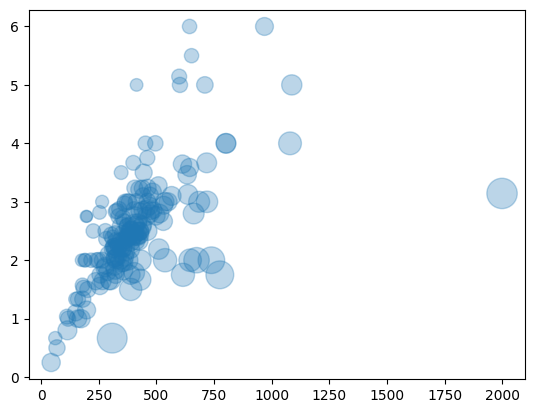

In [330]:
fig, ax = plt.subplots()

ax.scatter(
    agg_df["avg_revenue"],
    agg_df["avg_nights"],
    s=agg_df["avg_nightly_revenue"],
    alpha=0.3,
)

plt.show()